# Data Science Capstone Project - The Battle of the Neighborhoods

# Growth in the Restaurants Business

## Alberta Canada

#### For this project we are taking a trip to Alberta, a province of Canada by means of Data Science.
#### The aim is to have an overall view of what the sector has to offer and to see if there is room to 
#### to open a few more restaurants in the area.


##### DataFrame

###### Install Libraries

In [1]:
# Intall Geocoder
!pip install geocoder
print('Installed!')

     |████████████████████████████████| 98 kB 8.4 MB/s  eta 0:00:01
Installed!


In [2]:
# Install Geopy
!pip install geopy
print('Installed!')

Installed!


In [3]:
# Install Folium
!pip install folium
print('Installed!')

     |████████████████████████████████| 93 kB 4.0 MB/s  eta 0:00:01
Installed!


###### Import libraries

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
print("Imported!")

Imported!


###### Creating a DataFrame and Transforming the data

In [5]:
#extracting data from Wikipedia using BeautifulSoup
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T"
result  = requests.get(url)
print(url)
print(result.status_code)
print(result.headers)

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T
200
{'Date': 'Wed, 16 Dec 2020 20:49:09 GMT', 'Vary': 'Accept-Encoding,Cookie,Authorization', 'Server': 'ATS/8.0.8', 'X-Content-Type-Options': 'nosniff', 'P3p': 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'Content-Language': 'en', 'X-Request-Id': '5cc44c37-1d16-4b38-9e72-3c222e9cd068', 'Last-Modified': 'Sun, 06 Dec 2020 20:05:55 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Encoding': 'gzip', 'Age': '0', 'X-Cache': 'cp1089 hit, cp1089 miss', 'X-Cache-Status': 'hit-local', 'Server-Timing': 'cache;desc="hit-local"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Report-To': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'NEL': '{ "report_to": "wm_nel", "max_age": 86400, "failure_frac

In [6]:
soup = BeautifulSoup(result.content, 'html.parser')
table = soup.find('table')
trs = table.find_all('tr')
rows = []
for tr in trs:
    i = tr.find_all('td')
    if i:
        rows.append(i)

In [7]:
df = []
for row in rows:
    postalcode = row[0].text.rstrip()
    borough = row[1].text.rstrip()
    neighborhood = row[2].text.rstrip()
    if borough != 'Not assingned':
        if neighborhood == 'Not assigned':
            neighborhood = borough
        df.append([postalcode, borough, neighborhood])
        

In [8]:
# raw data output
df

[['T1AMedicine HatCentral',
  'T2ACalgary(Penbrooke Meadows / Marlborough)',
  'T3ACalgary(Dalhousie / Edgemont / Hamptons / Hidden Valley)'],
 ['T1BMedicine HatSouth',
  'T2BCalgary(Forest Lawn / Dover / Erin Woods)',
  'T3BCalgary(Montgomery / Bowness / Silver Springs / Greenwood)'],
 ['T1CMedicine HatNorth',
  'T2CCalgary(Lynnwood Ridge / Ogden / Foothills Industrial / Great Plains)',
  'T3CCalgary(Rosscarrock / Westgate / Wildwood / Shaganappi / Sunalta)'],
 ['T1ENot assigned',
  'T2ECalgary(Bridgeland / Greenview / Zoo / YYC)',
  'T3ECalgary(Lakeview / Glendale / Killarney / Glamorgan)'],
 ['T1GTaber',
  'T2GCalgary(Inglewood / Burnsland / Chinatown / East Victoria Park / Saddledome)',
  'T3GCalgary(Hawkwood / Arbour Lake / Citadel / Ranchlands / Royal Oak / Rocky Ridge)'],
 ['T1HLethbridgeNorth',
  'T2HCalgary(Highfield / Burns Industrial)',
  'T3HCalgary(Discovery Ridge / Signal Hill / West Springs /Christie Estates / Patterson / Cougar Ridge)'],
 ['T1JLethbridgeWest and Central

###### Load the Data

In [9]:
#column names
column_name = ['PostalCode', 'Borough', 'Neighborhood']
Alberta = pd.DataFrame(df, columns=column_name)

In [10]:
Alberta[Alberta.duplicated(['PostalCode'], keep=False)]

,PostalCode,Borough,Neighborhood


In [11]:
# viewing the first 10 rows of the data
Alberta.head(10)

,PostalCode,Borough,Neighborhood
0,T1AMedicine HatCentral,T2ACalgary(Penbrooke Meadows / Marlborough),T3ACalgary(Dalhousie / Edgemont / Hamptons / H...
1,T1BMedicine HatSouth,T2BCalgary(Forest Lawn / Dover / Erin Woods),T3BCalgary(Montgomery / Bowness / Silver Sprin...
2,T1CMedicine HatNorth,T2CCalgary(Lynnwood Ridge / Ogden / Foothills ...,T3CCalgary(Rosscarrock / Westgate / Wildwood /...
3,T1ENot assigned,T2ECalgary(Bridgeland / Greenview / Zoo / YYC),T3ECalgary(Lakeview / Glendale / Killarney / G...
4,T1GTaber,T2GCalgary(Inglewood / Burnsland / Chinatown /...,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...
5,T1HLethbridgeNorth,T2HCalgary(Highfield / Burns Industrial),T3HCalgary(Discovery Ridge / Signal Hill / Wes...
6,T1JLethbridgeWest and Central,T2JCalgary(Queensland / Lake Bonavista / Willo...,T3JCalgary(Martindale / Taradale / Falconridge...
7,T1KLethbridgeWest and South,T2KCalgary(Thorncliffe / Tuxedo Park),T3KCalgary(Sandstone / MacEwan Glen / Beddingt...
8,T1LBanff,T2LCalgary(Brentwood / Collingwood / Nose Hill),T3LCalgary(Tuscany / Scenic Acres)
9,T1MCoaldale,T2MCalgary(Mount Pleasant / Capitol Hill / Ban...,T3MCalgary(Cranston / Auburn Bay / Mahogany)


In [12]:
#viewing last 10 rows of dataframe
Alberta.tail(10)

,PostalCode,Borough,Neighborhood
10,T1NNot assigned,T2NCalgary(Kensington / Westmont / Parkdale / ...,T3NCalgaryNortheast
11,T1PStrathmore,T2PCalgary(City Centre / Calgary Tower),T3PCalgary(Symons Valley)
12,T1RBrooks,T2RCalgary(Connaught / West Victoria Park),T3RCalgaryNorthwest
13,T1SOkotoks,T2SCalgary(Elbow Park / Britannia / Parkhill /...,T3SCalgarySoutheast
14,T1TNot assigned,T2TCalgarySouth(Altadore / Bankview / Richmond),T3TTsuut'ina
15,T1VHigh River,T2VCalgary(Oak Ridge / Haysboro / Kingsland / ...,T3VNot assigned
16,T1WCanmore,T2WCalgary(Braeside / Cedarbrae / Woodbine),T3WNot assigned
17,T1XChestermere,T2XCalgary(Midnapore / Sundance),T3XNot assigned
18,T1YCalgary(Rundle / Whitehorn / Monterey Park),T2YCalgary(Millrise / Somerset / Bridlewood / ...,T3YNot assigned
19,T1ZRocky View,T2ZCalgary(Douglas Glen / McKenzie Lake / Copp...,T3ZRedwood Meadows


In [13]:
# statistcs
Alberta.describe()

,PostalCode,Borough,Neighborhood
count,20,20,20
unique,20,20,20
top,T1XChestermere,T2PCalgary(City Centre / Calgary Tower),T3XNot assigned
freq,1,1,1


In [14]:
Alberta = Alberta.dropna()
empty = 'Not assigned'
Alberta = Alberta[(Alberta.PostalCode != empty ) & (Alberta.Borough != empty) & (Alberta.Neighborhood != empty)]

In [15]:
Alberta.head()

,PostalCode,Borough,Neighborhood
0,T1AMedicine HatCentral,T2ACalgary(Penbrooke Meadows / Marlborough),T3ACalgary(Dalhousie / Edgemont / Hamptons / H...
1,T1BMedicine HatSouth,T2BCalgary(Forest Lawn / Dover / Erin Woods),T3BCalgary(Montgomery / Bowness / Silver Sprin...
2,T1CMedicine HatNorth,T2CCalgary(Lynnwood Ridge / Ogden / Foothills ...,T3CCalgary(Rosscarrock / Westgate / Wildwood /...
3,T1ENot assigned,T2ECalgary(Bridgeland / Greenview / Zoo / YYC),T3ECalgary(Lakeview / Glendale / Killarney / G...
4,T1GTaber,T2GCalgary(Inglewood / Burnsland / Chinatown /...,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...


In [16]:
def neighborhood_list(grouped):
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))

grp = Alberta.groupby(['PostalCode', 'Borough'])
Alberta_df = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

In [17]:
Alberta_df.head()

,PostalCode,Borough,Neighborhood
0,T1AMedicine HatCentral,T2ACalgary(Penbrooke Meadows / Marlborough),T3ACalgary(Dalhousie / Edgemont / Hamptons / H...
1,T1BMedicine HatSouth,T2BCalgary(Forest Lawn / Dover / Erin Woods),T3BCalgary(Montgomery / Bowness / Silver Sprin...
2,T1CMedicine HatNorth,T2CCalgary(Lynnwood Ridge / Ogden / Foothills ...,T3CCalgary(Rosscarrock / Westgate / Wildwood /...
3,T1ENot assigned,T2ECalgary(Bridgeland / Greenview / Zoo / YYC),T3ECalgary(Lakeview / Glendale / Killarney / G...
4,T1GTaber,T2GCalgary(Inglewood / Burnsland / Chinatown /...,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...


In [18]:
# rows and columns
Alberta_df.shape

(20, 3)

### Geographical Coordinates

##### Getting latitudes and the longitudes.

###### Import Libraries

In [19]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
print("Imported!")

Imported!


In [20]:
import geocoder
print('Imported!')

Imported!


In [21]:
#using the geolocator
address = 'Alberta,Canada'

geolocator = Nominatim(user_agent="AlbertaCanada")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Alberta Canada are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Alberta Canada are 55.001251, -115.002136.


In [22]:
#defining latitude and longitude
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Alberta, Canada'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords

get_latilong('T1ZRocky View')

[55.16950925700007, -114.51104221099996]

In [23]:
#defining coordinates per postal codes
postal_codes = Alberta_df['PostalCode']
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist()]

In [24]:
Alberta_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
Alberta_df['Latitude'] = Alberta_coords['Latitude']
Alberta_df['Longitude'] = Alberta_coords['Longitude']

In [25]:
#postalcode T1GTaber coordinates
Alberta_df[Alberta_df.PostalCode == 'T1GTaber']

,PostalCode,Borough,Neighborhood,Latitude,Longitude
4,T1GTaber,T2GCalgary(Inglewood / Burnsland / Chinatown /...,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,55.169509,-114.511042


In [26]:
#postalcode T1VHigh River coordinates
Alberta_df[Alberta_df.PostalCode == 'T1VHigh River']

,PostalCode,Borough,Neighborhood,Latitude,Longitude
15,T1VHigh River,T2VCalgary(Oak Ridge / Haysboro / Kingsland / ...,T3VNot assigned,50.776406,-112.855862


In [27]:
#postalcode T1YCalgary coordinates
Alberta_df[Alberta_df.PostalCode == 'T1YCalgary(Rundle / Whitehorn / Monterey Park)']

,PostalCode,Borough,Neighborhood,Latitude,Longitude
18,T1YCalgary(Rundle / Whitehorn / Monterey Park),T2YCalgary(Millrise / Somerset / Bridlewood / ...,T3YNot assigned,51.085,-113.92723


In [28]:
#showing the first 10 rows of dataframe
Alberta_df.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1AMedicine HatCentral,T2ACalgary(Penbrooke Meadows / Marlborough),T3ACalgary(Dalhousie / Edgemont / Hamptons / H...,55.169509,-114.511042
1,T1BMedicine HatSouth,T2BCalgary(Forest Lawn / Dover / Erin Woods),T3BCalgary(Montgomery / Bowness / Silver Sprin...,55.169509,-114.511042
2,T1CMedicine HatNorth,T2CCalgary(Lynnwood Ridge / Ogden / Foothills ...,T3CCalgary(Rosscarrock / Westgate / Wildwood /...,55.169509,-114.511042
3,T1ENot assigned,T2ECalgary(Bridgeland / Greenview / Zoo / YYC),T3ECalgary(Lakeview / Glendale / Killarney / G...,55.169509,-114.511042
4,T1GTaber,T2GCalgary(Inglewood / Burnsland / Chinatown /...,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,55.169509,-114.511042
5,T1HLethbridgeNorth,T2HCalgary(Highfield / Burns Industrial),T3HCalgary(Discovery Ridge / Signal Hill / Wes...,55.169509,-114.511042
6,T1JLethbridgeWest and Central,T2JCalgary(Queensland / Lake Bonavista / Willo...,T3JCalgary(Martindale / Taradale / Falconridge...,55.169509,-114.511042
7,T1KLethbridgeWest and South,T2KCalgary(Thorncliffe / Tuxedo Park),T3KCalgary(Sandstone / MacEwan Glen / Beddingt...,55.169509,-114.511042
8,T1LBanff,T2LCalgary(Brentwood / Collingwood / Nose Hill),T3LCalgary(Tuscany / Scenic Acres),55.169509,-114.511042
9,T1MCoaldale,T2MCalgary(Mount Pleasant / Capitol Hill / Ban...,T3MCalgary(Cranston / Auburn Bay / Mahogany),55.169509,-114.511042


In [29]:
#showing the last 10 rows of dataframe
Alberta_df.tail(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
10,T1NNot assigned,T2NCalgary(Kensington / Westmont / Parkdale / ...,T3NCalgaryNortheast,55.169509,-114.511042
11,T1PStrathmore,T2PCalgary(City Centre / Calgary Tower),T3PCalgary(Symons Valley),55.169509,-114.511042
12,T1RBrooks,T2RCalgary(Connaught / West Victoria Park),T3RCalgaryNorthwest,55.169509,-114.511042
13,T1SOkotoks,T2SCalgary(Elbow Park / Britannia / Parkhill /...,T3SCalgarySoutheast,55.169509,-114.511042
14,T1TNot assigned,T2TCalgarySouth(Altadore / Bankview / Richmond),T3TTsuut'ina,55.169509,-114.511042
15,T1VHigh River,T2VCalgary(Oak Ridge / Haysboro / Kingsland / ...,T3VNot assigned,50.776406,-112.855862
16,T1WCanmore,T2WCalgary(Braeside / Cedarbrae / Woodbine),T3WNot assigned,55.169509,-114.511042
17,T1XChestermere,T2XCalgary(Midnapore / Sundance),T3XNot assigned,55.169509,-114.511042
18,T1YCalgary(Rundle / Whitehorn / Monterey Park),T2YCalgary(Millrise / Somerset / Bridlewood / ...,T3YNot assigned,51.085000,-113.927230
19,T1ZRocky View,T2ZCalgary(Douglas Glen / McKenzie Lake / Copp...,T3ZRedwood Meadows,55.169509,-114.511042


In [30]:
print('The dataframe has {} bourough and {} neighborhoods.'.format(len(Alberta_df['Borough'].unique()),Alberta_df.shape[0]))

The dataframe has 20 bourough and 20 neighborhoods.


###### Create a Map of Alberta Canada superimposing the neighborhoods.

In [32]:
#create map of Alberta, Canada using latitude and longitude values
map_alberta = folium.Map(width=950,height=650,location=[55.001251, -115.002136], zoom_start=5)
folium.TileLayer('Stamen Terrain')

#add markers to map
for lat, lng, borough, neighborhood in zip(Alberta_df['Latitude'], Alberta_df['Longitude'], Alberta_df['Borough'], Alberta_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alberta)

    
map_alberta

In [33]:
#loking at a segment of Calgary in Alberta
Calgary_data = Alberta_df[Alberta_df['Borough'] == 'T2PCalgary(City Centre / Calgary Tower)'].reset_index(drop=True)
Calgary_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1PStrathmore,T2PCalgary(City Centre / Calgary Tower),T3PCalgary(Symons Valley),55.169509,-114.511042


In [34]:
#using the geolocator
address = 'City Center,Calgary,Alberta'

geolocator = Nominatim(user_agent="City CenterCalgaryAlberta")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of City Center Calgary Alberta are {}, {}.'.format(latitude, longitude))

The geographical coordinate of City Center Calgary Alberta are 51.0534234, -114.0625892.


### Map - City Center Calgary Alberta

In [35]:
#create map of City Center in Calgary Alberta,Canada using latitude and longitude values
map_calgary = folium.Map(width=950,height=450,location=[51.0534234, -114.0625892], zoom_start=11)

#add markers to map
for lat, lng, borough, neighborhood in zip(Calgary_data['Latitude'], Calgary_data['Longitude'], Calgary_data['Borough'], Calgary_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)

    
map_calgary

### Exploring and Clustering

##### Using Foursquare API

In [36]:
#Foursquare identification
CLIENT_ID = 'A4WJOKVIDMBDFL0TKINOHAS2AYRGVT5DUNVZDXJEZHQEAOUP'
CLIENT_SECRET = 'QEHG0UREZWAFWFQHUG05ECBXZAV2JOKO1FMIS25A5BCRSUGM'
VERSION = '20180605'

###### Let us explore the dataframe

In [37]:
LIMIT = 1000 
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([( name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'], v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [38]:
#showing nearby venues
df = Alberta_df
Alberta_venues = getNearbyVenues(names=Alberta_df['Neighborhood'], latitudes=Alberta_df['Latitude'],longitudes=Alberta_df['Longitude'])

T3ACalgary(Dalhousie / Edgemont / Hamptons / Hidden Valley)
T3BCalgary(Montgomery / Bowness / Silver Springs / Greenwood)
T3CCalgary(Rosscarrock / Westgate / Wildwood / Shaganappi / Sunalta)
T3ECalgary(Lakeview / Glendale / Killarney / Glamorgan)
T3GCalgary(Hawkwood / Arbour Lake / Citadel / Ranchlands / Royal Oak / Rocky Ridge)
T3HCalgary(Discovery Ridge / Signal Hill / West Springs /Christie Estates / Patterson / Cougar Ridge)
T3JCalgary(Martindale / Taradale / Falconridge / Saddle Ridge)
T3KCalgary(Sandstone / MacEwan Glen / Beddington / Harvest Hills / Coventry Hills / Panorama Hills)
T3LCalgary(Tuscany / Scenic Acres)
T3MCalgary(Cranston / Auburn Bay / Mahogany)
T3NCalgaryNortheast
T3PCalgary(Symons Valley)
T3RCalgaryNorthwest
T3SCalgarySoutheast
T3TTsuut'ina
T3VNot assigned
T3WNot assigned
T3XNot assigned
T3YNot assigned
T3ZRedwood Meadows


In [39]:
#venues statistics of nearby venues
print(Alberta_venues.shape)

(66, 7)


In [40]:
#display the first 5 rows of nearby venues by neighborhood
Alberta_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,T3ACalgary(Dalhousie / Edgemont / Hamptons / H...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
1,T3BCalgary(Montgomery / Bowness / Silver Sprin...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
2,T3CCalgary(Rosscarrock / Westgate / Wildwood /...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
3,T3ECalgary(Lakeview / Glendale / Killarney / G...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
4,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
5,T3HCalgary(Discovery Ridge / Signal Hill / Wes...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
6,T3JCalgary(Martindale / Taradale / Falconridge...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
7,T3KCalgary(Sandstone / MacEwan Glen / Beddingt...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
8,T3LCalgary(Tuscany / Scenic Acres),55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
9,T3MCalgary(Cranston / Auburn Bay / Mahogany),55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park


In [41]:
#display the last 10 rows of nearby venues by neighborhood
Alberta_venues.tail(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
46,T3YNot assigned,51.085000,-113.927230,La Jawab,51.097730,-113.962120,Asian Restaurant
47,T3YNot assigned,51.085000,-113.927230,Nirvana,51.097793,-113.960733,Indian Restaurant
48,T3YNot assigned,51.085000,-113.927230,Tim Hortons,51.098045,-113.959347,Coffee Shop
49,T3YNot assigned,51.085000,-113.927230,Subway,51.098281,-113.956355,Sandwich Place
50,T3YNot assigned,51.085000,-113.927230,Shell,51.071415,-113.957650,Gas Station
51,T3YNot assigned,51.085000,-113.927230,Calgary Co-op,51.074765,-113.956748,Grocery Store
52,T3YNot assigned,51.085000,-113.927230,Deeps Liquor Store,51.079407,-113.942506,Liquor Store
53,T3YNot assigned,51.085000,-113.927230,Don Hartman Northeast Sportsplex,51.101868,-113.934078,Skating Rink
54,T3YNot assigned,51.085000,-113.927230,Shoppers Drug Mart,51.097339,-113.956500,Pharmacy
55,T3YNot assigned,51.085000,-113.927230,Five Rivers Indian Cuisine,51.099510,-113.958854,Indian Restaurant


In [42]:
#top visited venues by borough
venues = getNearbyVenues(names=Alberta_df['Borough'],latitudes=Alberta_df['Latitude'],longitudes=Alberta_df['Longitude'])

T2ACalgary(Penbrooke Meadows / Marlborough)
T2BCalgary(Forest Lawn / Dover / Erin Woods)
T2CCalgary(Lynnwood Ridge / Ogden / Foothills Industrial / Great Plains)
T2ECalgary(Bridgeland / Greenview / Zoo / YYC)
T2GCalgary(Inglewood / Burnsland / Chinatown / East Victoria Park / Saddledome)
T2HCalgary(Highfield / Burns Industrial)
T2JCalgary(Queensland / Lake Bonavista / Willow Park / Acadia)
T2KCalgary(Thorncliffe / Tuxedo Park)
T2LCalgary(Brentwood / Collingwood / Nose Hill)
T2MCalgary(Mount Pleasant / Capitol Hill / Banff Trail)
T2NCalgary(Kensington / Westmont / Parkdale / University)
T2PCalgary(City Centre / Calgary Tower)
T2RCalgary(Connaught / West Victoria Park)
T2SCalgary(Elbow Park / Britannia / Parkhill / Mission)
T2TCalgarySouth(Altadore / Bankview / Richmond)
T2VCalgary(Oak Ridge / Haysboro / Kingsland / Kelvin Grove / Windsor Park)
T2WCalgary(Braeside / Cedarbrae / Woodbine)
T2XCalgary(Midnapore / Sundance)
T2YCalgary(Millrise / Somerset / Bridlewood / Evergreen)
T2ZCalgary(

In [43]:
#venues statistics
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
T2ACalgary(Penbrooke Meadows / Marlborough),1,1,1,1,1,1
T2BCalgary(Forest Lawn / Dover / Erin Woods),1,1,1,1,1,1
T2CCalgary(Lynnwood Ridge / Ogden / Foothills Industrial / Great Plains),1,1,1,1,1,1
T2ECalgary(Bridgeland / Greenview / Zoo / YYC),1,1,1,1,1,1
T2GCalgary(Inglewood / Burnsland / Chinatown / East Victoria Park / Saddledome),1,1,1,1,1,1
T2HCalgary(Highfield / Burns Industrial),1,1,1,1,1,1
T2JCalgary(Queensland / Lake Bonavista / Willow Park / Acadia),1,1,1,1,1,1
T2KCalgary(Thorncliffe / Tuxedo Park),1,1,1,1,1,1
T2LCalgary(Brentwood / Collingwood / Nose Hill),1,1,1,1,1,1


In [44]:
print('There are {} uniques categories.'.format(len(Alberta_venues['Venue Category'].unique())))

There are 26 uniques categories.


###### Analysing Each Neighborhood

In [45]:
#one hot encoding
Alberta_onehot = pd.get_dummies(Alberta_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Alberta_onehot['Neighborhood'] = Alberta_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [Alberta_onehot.columns[-1]] + list(Alberta_onehot.columns[:-1])
Alberta_onehot = Alberta_onehot[fixed_columns]

Alberta_onehot.head()

,Neighborhood,Asian Restaurant,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station,Golf Course,...,Karaoke Bar,Liquor Store,Park,Pharmacy,Pizza Place,Sandwich Place,Shoe Store,Skating Rink,Sporting Goods Shop,Vietnamese Restaurant
0,T3ACalgary(Dalhousie / Edgemont / Hamptons / H...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,T3BCalgary(Montgomery / Bowness / Silver Sprin...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,T3CCalgary(Rosscarrock / Westgate / Wildwood /...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,T3ECalgary(Lakeview / Glendale / Killarney / G...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
Alberta_onehot.shape

(66, 27)

###### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [47]:
Alberta_grouped = Alberta_onehot.groupby('Neighborhood').mean().reset_index()
Alberta_grouped

,Neighborhood,Asian Restaurant,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station,Golf Course,...,Karaoke Bar,Liquor Store,Park,Pharmacy,Pizza Place,Sandwich Place,Shoe Store,Skating Rink,Sporting Goods Shop,Vietnamese Restaurant
0,T3ACalgary(Dalhousie / Edgemont / Hamptons / H...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,T3BCalgary(Montgomery / Bowness / Silver Sprin...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,T3CCalgary(Rosscarrock / Westgate / Wildwood /...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,T3ECalgary(Lakeview / Glendale / Killarney / G...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
4,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,T3HCalgary(Discovery Ridge / Signal Hill / Wes...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,T3JCalgary(Martindale / Taradale / Falconridge...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
7,T3KCalgary(Sandstone / MacEwan Glen / Beddingt...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,T3LCalgary(Tuscany / Scenic Acres),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
9,T3MCalgary(Cranston / Auburn Bay / Mahogany),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


###### Confirm new size

In [53]:
Alberta_grouped.shape

(20, 27)

###### Most Common Venues - Top 10

In [54]:
Alberta_grouped = Alberta_onehot.groupby('Neighborhood').mean().reset_index()

In [55]:
num_top_venues = 10

for hood in Alberta_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Alberta_grouped[Alberta_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 10})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----T3ACalgary(Dalhousie / Edgemont / Hamptons / Hidden Valley)----
                 venue  freq
0                 Park   1.0
1     Asian Restaurant   0.0
2                 Bank   0.0
3  Sporting Goods Shop   0.0
4         Skating Rink   0.0
5           Shoe Store   0.0
6       Sandwich Place   0.0
7          Pizza Place   0.0
8             Pharmacy   0.0
9         Liquor Store   0.0


----T3BCalgary(Montgomery / Bowness / Silver Springs / Greenwood)----
                 venue  freq
0                 Park   1.0
1     Asian Restaurant   0.0
2                 Bank   0.0
3  Sporting Goods Shop   0.0
4         Skating Rink   0.0
5           Shoe Store   0.0
6       Sandwich Place   0.0
7          Pizza Place   0.0
8             Pharmacy   0.0
9         Liquor Store   0.0


----T3CCalgary(Rosscarrock / Westgate / Wildwood / Shaganappi / Sunalta)----
                 venue  freq
0                 Park   1.0
1     Asian Restaurant   0.0
2                 Bank   0.0
3  Sporting Goods Shop   0.

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
Num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Alberta_grouped['Neighborhood']

for ind in np.arange(Alberta_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Alberta_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,T3ACalgary(Dalhousie / Edgemont / Hamptons / H...,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
1,T3BCalgary(Montgomery / Bowness / Silver Sprin...,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
2,T3CCalgary(Rosscarrock / Westgate / Wildwood /...,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
3,T3ECalgary(Lakeview / Glendale / Killarney / G...,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
4,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
5,T3HCalgary(Discovery Ridge / Signal Hill / Wes...,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
6,T3JCalgary(Martindale / Taradale / Falconridge...,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
7,T3KCalgary(Sandstone / MacEwan Glen / Beddingt...,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
8,T3LCalgary(Tuscany / Scenic Acres),Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
9,T3MCalgary(Cranston / Auburn Bay / Mahogany),Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station


### Cluster the neighborhoods in Alberta and visualize them

In [58]:
# set number of clusters
kclusters = 3

Alberta_grouped_clustering = Alberta_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Alberta_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

###### Create new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [59]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Alberta_merged = Alberta_df

# merge alberta_grouped with alberta_df to add latitude/longitude for each neighborhood
Alberta_merged = Alberta_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# check the last columns!
Alberta_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,T1AMedicine HatCentral,T2ACalgary(Penbrooke Meadows / Marlborough),T3ACalgary(Dalhousie / Edgemont / Hamptons / H...,55.169509,-114.511042,0,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
1,T1BMedicine HatSouth,T2BCalgary(Forest Lawn / Dover / Erin Woods),T3BCalgary(Montgomery / Bowness / Silver Sprin...,55.169509,-114.511042,0,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
2,T1CMedicine HatNorth,T2CCalgary(Lynnwood Ridge / Ogden / Foothills ...,T3CCalgary(Rosscarrock / Westgate / Wildwood /...,55.169509,-114.511042,0,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
3,T1ENot assigned,T2ECalgary(Bridgeland / Greenview / Zoo / YYC),T3ECalgary(Lakeview / Glendale / Killarney / G...,55.169509,-114.511042,0,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station
4,T1GTaber,T2GCalgary(Inglewood / Burnsland / Chinatown /...,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,55.169509,-114.511042,0,Park,Vietnamese Restaurant,History Museum,Bank,Breakfast Spot,Coffee Shop,Convenience Store,Diner,Fast Food Restaurant,Gas Station


###### Visualize the resulting clusters

In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Alberta_merged['Latitude'], Alberta_merged['Longitude'], Alberta_merged['Neighborhood'], Alberta_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### EXPLORING THE AREA AND SEE IF OPENING NEW RESTAURANTS SHOULD BE RECOMMENDED

In [62]:
#data framing
Alberta_new = Alberta_venues

In [65]:
#showing the firt five rows of new dataframe
Alberta_new.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,T3ACalgary(Dalhousie / Edgemont / Hamptons / H...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
1,T3BCalgary(Montgomery / Bowness / Silver Sprin...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
2,T3CCalgary(Rosscarrock / Westgate / Wildwood /...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
3,T3ECalgary(Lakeview / Glendale / Killarney / G...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park
4,T3GCalgary(Hawkwood / Arbour Lake / Citadel / ...,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park


In [66]:
#showing last 5 rows
Alberta_new.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
61,T3YNot assigned,51.085000,-113.927230,Cowboys Taphouse,51.098205,-113.960194,Karaoke Bar
62,T3YNot assigned,51.085000,-113.927230,Quiznos,51.098339,-113.961591,Sandwich Place
63,T3YNot assigned,51.085000,-113.927230,Little Caesars Pizza,51.092557,-113.966641,Pizza Place
64,T3YNot assigned,51.085000,-113.927230,Eggs & More,51.097451,-113.957396,Breakfast Spot
65,T3ZRedwood Meadows,55.169509,-114.511042,Crescent Heights Park,55.169394,-114.510839,Park


###### Venues People Frequent the most in Alberta Canada

In [67]:
# create a dataframe of the top categories
Alberta_Venues_Top=Alberta_new['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Alberta_Venues_Top=Alberta_Venues_Top.reset_index()
Alberta_Venues_Top.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Alberta_Venues_Top

,Venue_Category,Frequency
0,Park,18
1,Sandwich Place,6
2,Gas Station,5
3,Grocery Store,5
4,Fast Food Restaurant,3
5,Convenience Store,3
6,Indian Restaurant,2
7,Coffee Shop,2
8,Asian Restaurant,2
9,Bank,2


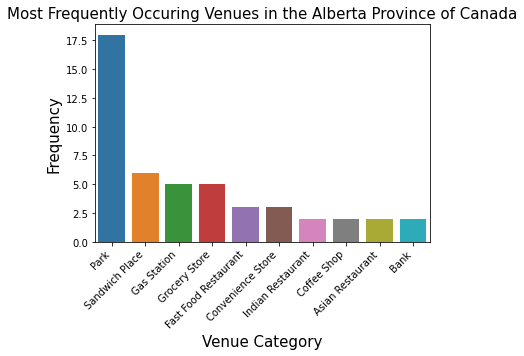

<Figure size 1296x504 with 0 Axes>

In [68]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Alberta_Venues_Top)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Most Frequently Occuring Venues in the Alberta Province of Canada', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [69]:
Alberta_Venues_Top.shape

(10, 2)

### Restaurant only DataFrame

In [70]:
# Create a DataFrame concentrating only on Restaurants 
Alberta_Venues_only_restaurant = Alberta_venues[Alberta_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Alberta_Venues_only_restaurant.index = np.arange(1, len(Alberta_Venues_only_restaurant )+1)

In [71]:
print (Alberta_Venues_only_restaurant['Venue Category'].value_counts())

Fast Food Restaurant     3
Indian Restaurant        2
Asian Restaurant         2
Vietnamese Restaurant    1
Japanese Restaurant      1
Name: Venue Category, dtype: int64


In [72]:
print('There are {} unique categories of Restaurants.'.format(len(Alberta_Venues_only_restaurant['Venue Category'].unique())))

There are 5 unique categories of Restaurants.


In [73]:
# create a dataframe of the categories
Alberta_Venues_Top5=Alberta_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Alberta_Venues_Top5=Alberta_Venues_Top5.reset_index()
Alberta_Venues_Top5.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Alberta_Venues_Top5

,Venue_Category,Frequency
0,Fast Food Restaurant,3
1,Indian Restaurant,2
2,Asian Restaurant,2
3,Vietnamese Restaurant,1
4,Japanese Restaurant,1


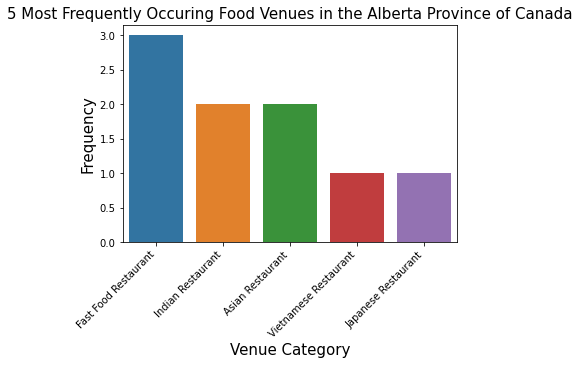

<Figure size 1296x504 with 0 Axes>

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Alberta_Venues_Top5)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('5 Most Frequently Occuring Food Venues in the Alberta Province of Canada', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [74]:
Alberta_Venues_only_restaurant.shape

(9, 7)

###### Resulting DataFrame

In [75]:
#restaurant only dataframe
Alberta_Venues_only_restaurant.head(9)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,T3YNot assigned,51.085,-113.92723,A&W,51.068291,-113.933571,Fast Food Restaurant
2,T3YNot assigned,51.085,-113.92723,Saigon passion,51.096873,-113.960714,Asian Restaurant
3,T3YNot assigned,51.085,-113.92723,Edo Japan,51.098282,-113.956583,Japanese Restaurant
4,T3YNot assigned,51.085,-113.92723,McDonald's,51.075813,-113.957891,Fast Food Restaurant
5,T3YNot assigned,51.085,-113.92723,Pho Hoang,51.098337,-113.955525,Vietnamese Restaurant
6,T3YNot assigned,51.085,-113.92723,La Jawab,51.097730,-113.962120,Asian Restaurant
7,T3YNot assigned,51.085,-113.92723,Nirvana,51.097793,-113.960733,Indian Restaurant
8,T3YNot assigned,51.085,-113.92723,Five Rivers Indian Cuisine,51.099510,-113.958854,Indian Restaurant
9,T3YNot assigned,51.085,-113.92723,Taco Bell,51.097990,-113.959314,Fast Food Restaurant


### Area identification

In [76]:
#T1YCalgary coordinates is TY3Not assigned Neighborhood
Alberta_df[Alberta_df.PostalCode == 'T1YCalgary(Rundle / Whitehorn / Monterey Park)']

,PostalCode,Borough,Neighborhood,Latitude,Longitude
18,T1YCalgary(Rundle / Whitehorn / Monterey Park),T2YCalgary(Millrise / Somerset / Bridlewood / ...,T3YNot assigned,51.085,-113.92723


In [78]:
print('T1YCalgary(Rundle / Whitehorn / Monterey Park) is TY3Not assigned Neighborhood')

T1YCalgary(Rundle / Whitehorn / Monterey Park) is TY3Not assigned Neighborhood


### Map of the Postal Code with the most Restaurants

In [80]:
#create map of City Center in Calgary Alberta,Canada using latitude and longitude values
map_T1Ycalgary = folium.Map(width=950,height=650,location=[51.085, -113.92723], zoom_start=11)

#add markers to map
for lat, lng, borough, neighborhood in zip(Alberta_df['Latitude'], Alberta_df['Longitude'], Alberta_df['Borough'], Alberta_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.7,
        parse_html=False).add_to(map_T1Ycalgary)

    
map_T1Ycalgary

In [81]:
Alberta_Venues_only_restaurant.shape

(9, 7)

###### The map shows the restaurants are closest to the area of  Calgary International Airport. 

### Conclusion

In [82]:
print('There are 5 unique categories of Restaurants as per the Foursquare Api')
print('3 are Fast food Restaurants')
print('2 are Asian Restaurants')
print('2 are Indian Restaurants')
print('1 is a Japanese Restaurant')
print('1 is a Vietnamese Restaurant')
print('Venue shows 0 Italian Restaurants!')
print('Venue shows 0 French Restaurants')
print('Venue shows 0 Greek Restaurants')
print('Venue shows 0 Steak House restaurants')

There are 5 unique categories of Restaurants as per the Foursquare Api
3 are Fast food Restaurants
2 are Asian Restaurants
2 are Indian Restaurants
1 is a Japanese Restaurant
1 is a Vietnamese Restaurant
Venue shows 0 Italian Restaurants!
Venue shows 0 French Restaurants
Venue shows 0 Greek Restaurants
Venue shows 0 Steak House restaurants


### Observation!